In [1]:
import os
import pickle

import cv2  # Thư viện OpenCV
import matplotlib.pyplot as plt
import numpy as np

data_dir = os.path.abspath("../datasets")

if os.path.exists(data_dir):
    print("Đường dẫn tồn tại.")
else:
    print("Đường dẫn không tồn tại.")
# Danh sách các số
categories = [
    "2",
    "5",
]

data = []  # Danh sách để lưu dữ liệu hình ảnh và nhãn tương ứng


def make_data():
    for category in categories:
        path = os.path.join(
            data_dir, category
        )  # Đường dẫn đến thư mục của mỗi số
        label = categories.index(category)  # Gán một nhãn duy nhất cho mỗi số

        # Duyệt qua các hình ảnh trong số hiện tại
        for img_name in os.listdir(path):
            image_path = os.path.join(
                path, img_name
            )  # Đường dẫn đầy đủ đến hình ảnh hiện tại
            image = cv2.imread(image_path)  # Đọc hình ảnh bằng thư viện OpenCV

            # cv2.imshow("image sdf sđf", image)  # Hiển thị hình ảnh (để kiểm tra lỗi)

            # In thông tin về hình ảnh hiện tại
            print("image_path: ", image_path)
            print("img_name: ", img_name)

            try:
                # Tiền xử lý hình ảnh
                image = cv2.cvtColor(
                    image, cv2.COLOR_BGR2RGB
                )  # Chuyển đổi từ BGR sang RGB
                image = cv2.resize(
                    image, (224, 224)
                )  # Thay đổi kích thước hình ảnh thành (224, 224)
                image = np.array(
                    image, dtype=np.float32
                )  # Chuyển hình ảnh thành mảng NumPy kiểu float32

                # Thêm hình ảnh và nhãn vào danh sách dữ liệu
                data.append([image, label])

            except Exception as e:
                # Nếu có lỗi (ví dụ, không thể tải hình ảnh), bỏ qua hình ảnh hiện tại
                pass

        print(len(data))

        # Lưu danh sách dữ liệu vào một tệp pickle sau khi xử lý mỗi số
        pik = open("data.pickle", "wb")
        pickle.dump(data, pik)
        pik.close


# Hàm để tải dữ liệu từ tệp pickle đã lưu
def load_data():
    pick = open("data.pickle", "rb")
    data = pickle.load(pick)
    pick.close
    np.random.shuffle(data)  # Xáo trộn dữ liệu ngẫu nhiên

    # Tách các đặc trưng và nhãn từ dữ liệu đã tải
    feature = []
    labels = []
    for img, label in data:
        feature.append(img)
        labels.append(label)

    feature = np.array(feature, dtype=np.float32)
    labels = np.array(labels)
    feature = feature / 255.0  # Chuẩn hóa giá trị pixel về khoảng từ 0 đến 1

    return [feature, labels]


# Gọi hàm make_data để xử lý và lưu dữ liệu
make_data()


Đường dẫn tồn tại.
image_path:  d:\ITPTIT\IOT\datasets\2\1.png
img_name:  1.png
image_path:  d:\ITPTIT\IOT\datasets\2\10.png
img_name:  10.png
image_path:  d:\ITPTIT\IOT\datasets\2\100.png
img_name:  100.png
image_path:  d:\ITPTIT\IOT\datasets\2\101.png
img_name:  101.png
image_path:  d:\ITPTIT\IOT\datasets\2\102.png
img_name:  102.png
image_path:  d:\ITPTIT\IOT\datasets\2\103.png
img_name:  103.png
image_path:  d:\ITPTIT\IOT\datasets\2\104.png
img_name:  104.png
image_path:  d:\ITPTIT\IOT\datasets\2\105.png
img_name:  105.png
image_path:  d:\ITPTIT\IOT\datasets\2\106.png
img_name:  106.png
image_path:  d:\ITPTIT\IOT\datasets\2\107.png
img_name:  107.png
image_path:  d:\ITPTIT\IOT\datasets\2\108.png
img_name:  108.png
image_path:  d:\ITPTIT\IOT\datasets\2\109.png
img_name:  109.png
image_path:  d:\ITPTIT\IOT\datasets\2\11.png
img_name:  11.png
image_path:  d:\ITPTIT\IOT\datasets\2\110.png
img_name:  110.png
image_path:  d:\ITPTIT\IOT\datasets\2\111.png
img_name:  111.png
image_path:  d

In [2]:
# Import các thư viện cần thiết
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# from utils import load_data  # import hàm load_data từ file utils

print("Duong")
# Load dữ liệu từ hàm load_data
(feature, labels) = load_data()
print("Duong3")
# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra (90% huấn luyện, 10% kiểm tra)
x_train, x_test, y_train, y_test = train_test_split(feature, labels, test_size=0.1)
print("Duong2")
categories = [
    "2",
    "5",
]
# Tạo lớp đầu vào với kích thước (224, 224, 3) đại diện cho ảnh màu 224x224 pixels với 3 kênh màu (RGB)
input_layer = tf.keras.layers.Input([224, 224, 3])

# Lớp Convolutional Neural Network (CNN) với 32 bộ lọc, kích thước kernel 5x5, và hàm kích hoạt ReLU
conv1 = tf.keras.layers.Conv2D(  # để lọc ra các đặc trưng của ảnh
    filters=32, kernel_size=(5, 5), padding="Same", activation="relu"
)(input_layer)
# Lớp MaxPooling để giảm kích thước ảnh
pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)

# Tương tự, thêm các lớp Convolutional, MaxPooling khác để xây dựng CNN
conv2 = tf.keras.layers.Conv2D(
    filters=64, kernel_size=(3, 3), padding="Same", activation="relu"
)(pool1)

pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(conv2)

conv3 = tf.keras.layers.Conv2D(
    filters=96, kernel_size=(3, 3), padding="Same", activation="relu"
)(pool2)
pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(conv3)

conv4 = tf.keras.layers.Conv2D(filters=96, kernel_size=(3, 3), padding="Same")(pool3)

pool4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(conv4)

# Lớp Flatten để chuyển đổi dữ liệu thành dạng vector trước khi đưa vào lớp Fully Connected (Dense)
flt1 = tf.keras.layers.Flatten()(pool4)

# Lớp Fully Connected với 512 đơn vị và hàm kích hoạt ReLU
dn1 = tf.keras.layers.Dense(512, activation="relu")(flt1)

# Thêm lớp dropout với tỷ lệ dropout là 0.2 
# dropout1 = tf.keras.layers.Dropout(0.2)(dn1)

# Lớp đầu ra với 1 đơn vị và hàm kích hoạt sigmoid cho phân loại nhị phân
out = tf.keras.layers.Dense(1, activation="sigmoid")(dn1)

# Tạo mô hình bằng cách kết nối các lớp lại với nhau
model = tf.keras.Model(input_layer, out)

# Biên soạn mô hình với optimizer là Adam, hàm mất mát là binary crossentropy
# và đánh giá hiệu suất bằng độ chính xác
model.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]
)

# Huấn luyện mô hình trên dữ liệu huấn luyện (x_train, y_train) với batch size là 100 và 150 epochs
history = model.fit(x_train, y_train, batch_size=100, epochs=150, validation_data=(x_test, y_test))

# Lưu mô hình đã huấn luyện vào tệp "hand_gesture_model.h5"
model.save("hand_gesture_model.h5")


Duong
Duong3
Duong2
Epoch 1/150
10/10 [==============================] - 77s 7s/step - loss: 0.9824 - accuracy: 0.4929 - val_loss: 0.6845 - val_accuracy: 0.5000
Epoch 2/150
10/10 [==============================] - 72s 7s/step - loss: 0.6633 - accuracy: 0.6454 - val_loss: 0.5408 - val_accuracy: 0.9118
Epoch 3/150
10/10 [==============================] - 49s 5s/step - loss: 0.3265 - accuracy: 0.9078 - val_loss: 0.0489 - val_accuracy: 0.9706
Epoch 4/150
10/10 [==============================] - 48s 5s/step - loss: 0.0842 - accuracy: 0.9682 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 5/150
10/10 [==============================] - 47s 5s/step - loss: 0.0332 - accuracy: 0.9879 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 6/150
10/10 [==============================] - 45s 4s/step - loss: 0.0208 - accuracy: 0.9945 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 7/150
10/10 [==============================] - 45s 4s/step - loss: 0.0145 - accuracy: 0.9956 - val_loss: 0.0010 - val_accuracy: 

c:\Users\Tung Duong\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


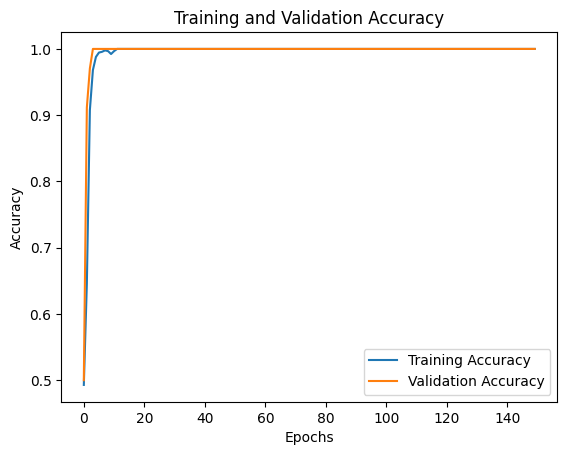

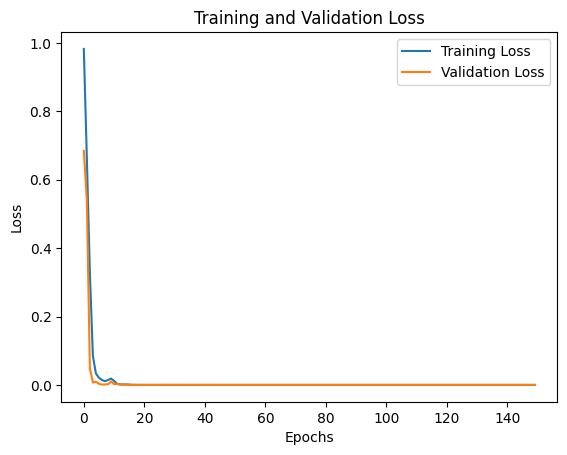

In [3]:
# Trực quan hóa độ chính xác trên tập huấn luyện và tập kiểm tra
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Trực quan hóa hàm mất mát trên tập huấn luyện và tập kiểm tra
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
